# Análisis del dataset de PlazaVea

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
filecsv = 'plazavea_20241008-152801.csv'
df = pd.read_csv(filecsv, sep=',', low_memory=False)

In [70]:
df.shape

(41304, 34)

In [71]:
campos = ['product_id', 'product_name', 'brand', 'brand_id', 'brand_image_url', 'category_id', 'product_title', 'metatag_description', 'categories_text', 'categories_ids', 'link', 'vendido_por', 'descripcion_producto', 'presentacion', 'presentacion_empaque', 'pack', 'porcion_sugerida', 'azucares_porcion', 'carbohidratos_porcion', 'descripcion_nutricional', 'grasas_porcion', 'advertencias_consumo', 'item_id', 'ean', 'image_url', 'value', 'is_available', 'available_quantity', 'price', 'list_price', 'price_without_discount', 'price_valid_until', 'created', 'product_uri_json']

df.columns = campos

## Eliminar columnas que no se utilizarán
1. product_id
2. brand
3. brand_id
4. brand_image_url
5. category_id
6. metatag_description
7. categories_ids
8. item_id
9. ean
10. is_available
11. price_valid_until
12. created
13. product_uri_json
14. price_without_discount
15. list_price

In [72]:
df.drop(['product_id', 'product_title','brand', 'brand_id', 'brand_image_url', 'category_id', 'metatag_description', 'categories_ids', 'item_id', 'ean', 'is_available',  'pack', 'presentacion', 'presentacion_empaque', 'porcion_sugerida',  'azucares_porcion',  'carbohidratos_porcion', 'image_url','descripcion_nutricional', 'grasas_porcion', 'advertencias_consumo', 'price_valid_until', 'created', 'product_uri_json', 'price_without_discount', 'available_quantity','value', 'list_price', 'vendido_por'], axis=1, inplace=True)

df.columns.to_list()

['product_name', 'categories_text', 'link', 'descripcion_producto', 'price']

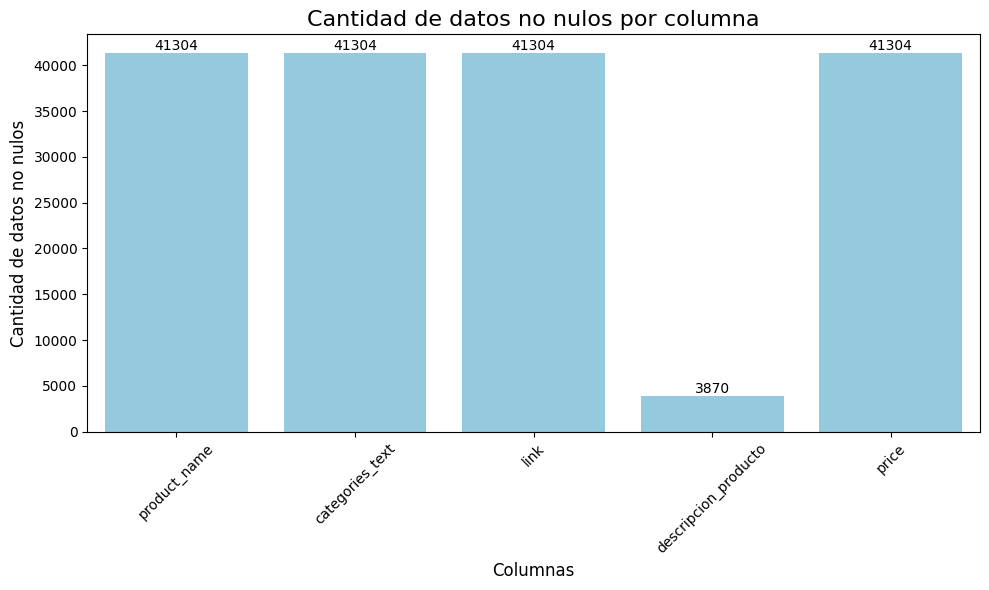

In [74]:
# Calcular la cantidad de datos no nulos por columna
non_null_counts = df.notnull().sum()

# Convertirlo en un DataFrame para facilitar el trabajo con Seaborn
non_null_df = non_null_counts.reset_index()
non_null_df.columns = ['Column', 'NonNullCount']

# Crear el gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=non_null_df, x='Column', y='NonNullCount', color='skyblue')  # Cambiamos `palette` por `color`

# Mostrar valores en las barras
for i in ax.containers:
    ax.bar_label(i, fmt='%d', label_type='edge')

plt.title('Cantidad de datos no nulos por columna', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de datos no nulos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### La columna "descripcion_producto" tiene solo 9% de información

## Limpieza de datos

In [75]:
marketplace = 'plazaVea'
df['descripcion_producto'] = df['descripcion_producto'].fillna(marketplace)
df['source'] = marketplace

In [76]:
def clean_categories(texto: str)-> str:
    categories = texto.replace('[', '').replace(']', '').replace("'", '')
    categories = categories.replace('/', ',').replace(',,', ',')
    categories = categories.replace(', ,', ',')
    return categories

def categories_to_list(texto: str)-> list:
    lista = list(dict.fromkeys(texto.split(',')))
    lista_limpia = list(filter(lambda x: x != '', lista))
    return lista_limpia
    
df['categories2'] = df['categories_text'].apply(clean_categories)
df['categories'] = df['categories2'].apply(categories_to_list)
df.drop(['categories_text', 'categories2'], axis=1, inplace=True)

In [77]:
import re

reemplazar = ['Importante destacar', 'Descripción del producto']

eliminar  = ['¡Conoce las distintas opciones', 
             'Otro punto importante es', 
             '¡Realiza tus combinaciones', 
             'Complementa tus', 
             'Finalmente, ', 
             'Finalmente ', 
             'Sin embargo, ',
             'Por ello',
             'Ingresa a la página',
             'La imagen es sólo referencial',
             'Imagen referencial',
             'En plazaVea ',
             'Complenta tus ',
             'En la web de ',
             'Encuentra más']

def clean_description(texto: str)-> str:
    if texto is not None:
        nuevo_texto = texto
        for palabra in reemplazar:
            nuevo_texto = nuevo_texto.replace(palabra, '.')
            nuevo_texto = nuevo_texto.replace('\n', '')
        
        for frase in eliminar:
            nuevo_texto = re.sub(frase + '.*', '', nuevo_texto, flags=re.DOTALL)
                       
        return nuevo_texto
    else:
        return texto
    
df['descripcion_producto'] = df['descripcion_producto'].apply(clean_description)

In [78]:
# tempo = df.query("`descripcion_producto` != 'plazaVea'")['descripcion_producto'].sample(n=10)
# for t in tempo:
#     print(t, end="\n\n")

In [79]:
df.sample(n=5)

,product_name,link,descripcion_producto,price,source,categories
30584,Electro-Voice EVF-1152S Single Sistema de alta...,https://www.plazavea.com.pe/electro-voice-evf-...,plazaVea,17679.0,plazaVea,"[Tecnología, Audio, Parlantes]"
30535,LG CineBeam HU715QW 2500-Lumen XPR 4K UHD Smar...,https://www.plazavea.com.pe/lg-cinebeam-hu715q...,plazaVea,17959.0,plazaVea,"[Tecnología, Computo, Proyectores]"
1378,Bcaa Level 8000 400gr Fruit+multi Pro 500gr+gl...,https://www.plazavea.com.pe/bcaa-level-8000-40...,plazaVea,299.9,plazaVea,"[Cuidado Personal y Salud, Vitaminas y Nutrici..."
16519,20Th Century Boys: The Perfect Edition Vol. 8,https://www.plazavea.com.pe/20th-century-boys-...,plazaVea,101.0,plazaVea,"[Librería y Oficina, Libros y Agendas, Cómic y..."
37884,Body de Malla con Entrepierna Abierta Rosa Len...,https://www.plazavea.com.pe/body-de-malla-con-...,plazaVea,199.0,plazaVea,"[Moda Mujer, Lencería y Pijamas Mujer, Brasieres]"


In [81]:
!pip install pyarrow fastparquet --quiet

In [82]:
# Guardar el dataset limpio como parquet
df.to_parquet('plazavea.parquet')